In [91]:
import pandas as pd
!pip install river

In [124]:
dataset = pd.read_csv("hospital_wait.csv")

In [125]:
dataset.head()
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [94]:
params = {'converters': {'value': float},'parse_dates': {'time': "%Y-%m-%d %H:%M:%S"}}

dataset = dict()
from river import stream
for x, y in stream.iter_csv('hospital_wait.csv', target = 'value', **params):
    print(x,y)

{'time': datetime.datetime(2022, 7, 28, 17, 11, 55)} 323.0
{'time': datetime.datetime(2022, 7, 28, 17, 26, 56)} 323.0
{'time': datetime.datetime(2022, 7, 28, 17, 41, 55)} 275.0
{'time': datetime.datetime(2022, 7, 28, 17, 56, 56)} 275.0
{'time': datetime.datetime(2022, 7, 28, 18, 11, 56)} 235.0
{'time': datetime.datetime(2022, 7, 28, 18, 26, 56)} 235.0
{'time': datetime.datetime(2022, 7, 28, 18, 41, 56)} 241.0
{'time': datetime.datetime(2022, 7, 28, 18, 56, 59)} 241.0
{'time': datetime.datetime(2022, 7, 28, 19, 11, 55)} 273.0
{'time': datetime.datetime(2022, 7, 28, 19, 26, 56)} 273.0
{'time': datetime.datetime(2022, 7, 28, 19, 41, 56)} 241.0
{'time': datetime.datetime(2022, 7, 28, 19, 56, 55)} 241.0
{'time': datetime.datetime(2022, 7, 28, 20, 11, 55)} 221.0
{'time': datetime.datetime(2022, 7, 28, 20, 26, 56)} 221.0
{'time': datetime.datetime(2022, 7, 28, 20, 41, 56)} 288.0
{'time': datetime.datetime(2022, 7, 28, 20, 56, 55)} 288.0
{'time': datetime.datetime(2022, 7, 28, 21, 11, 56)} 243

In [95]:
from river import compose
from river import linear_model
from river import metrics
from river import evaluate
from river import preprocessing
from river import feature_extraction
from river import stats
from river import optim
from river import facto
from river import model_selection
from river import time_series
from river import tree

In [188]:
import math
import datetime
import numpy as np

hour_list = [str(i) for i in range (0,24)]
minute_list = [f'{str(i)} min' for i in range (0, 60)]
def get_hour(x):
    x['h'] = x['time'].hour
    return x
print(get_hour({'time': datetime.datetime(2022, 7, 22, 15, 3, 37)}))

def get_minute(x):
    x['m'] = x['time'].minute//15 + 1
    return x

def get_day(x):
    
    return {'d' : x['time'].day}

def get_hour_sin_and_cos(x):
    x['sin_h'] = np.sin(np.pi*(x['time'].hour)/12)
    x['cos_h'] = np.cos(np.pi*(x['time'].hour)/12)
    return {'sin_h' : np.sin(np.pi*(x['time'].hour)/12), 'cos_h': np.cos(np.pi*(x['time'].hour)/12)}
print(get_hour_sin_and_cos({'time': datetime.datetime(2022, 7, 22, 6, 3, 37)}))

def get_minute_distances(x):
    x['sin_m'] = np.sin(np.pi*(x['time'].minute)/30)
    x['cos_m'] = np.cos(np.pi*(x['time'].minute)/30)
    return {'sin_m' : np.sin(np.pi*(x['time'].minute)/30), 'cos_m': np.cos(np.pi*(x['time'].minute)/30)}

def get_date_progress(x):
    return {'date': x['time'].toordinal() - datetime.datetime(2022, 1, 1, 0, 0).toordinal()}

i = 0
temp = [323,323,323,323]
cache = [temp]
my_dict = {}
print(cache)
for x, y in stream.iter_csv('hospital_wait.csv', target = 'value', **params):
    print(x)
    if i < 4:
        t = temp.copy()
        t[i] = y
        cache.append(t)      
        temp = t
        my_dict[x['time']] = t
    else:
        t = temp.copy()
        t.pop(0)
        t.append(y)
        cache.append(t)
        temp = t
        my_dict[x['time']] = t
    i += 1

print(my_dict)

def get_lag(x):
    lag_values = my_dict[x['time']]
    return {'lag_1': lag_values[0], 'lag_2': lag_values[1], 'lag_3': lag_values[2], 'lag_4': lag_values[3]}
    

{'time': datetime.datetime(2022, 7, 22, 15, 3, 37), 'h': 15}
{'sin_h': 1.0, 'cos_h': 6.123233995736766e-17}
[[323, 323, 323, 323]]
{'time': datetime.datetime(2022, 7, 28, 17, 11, 55)}
{'time': datetime.datetime(2022, 7, 28, 17, 26, 56)}
{'time': datetime.datetime(2022, 7, 28, 17, 41, 55)}
{'time': datetime.datetime(2022, 7, 28, 17, 56, 56)}
{'time': datetime.datetime(2022, 7, 28, 18, 11, 56)}
{'time': datetime.datetime(2022, 7, 28, 18, 26, 56)}
{'time': datetime.datetime(2022, 7, 28, 18, 41, 56)}
{'time': datetime.datetime(2022, 7, 28, 18, 56, 59)}
{'time': datetime.datetime(2022, 7, 28, 19, 11, 55)}
{'time': datetime.datetime(2022, 7, 28, 19, 26, 56)}
{'time': datetime.datetime(2022, 7, 28, 19, 41, 56)}
{'time': datetime.datetime(2022, 7, 28, 19, 56, 55)}
{'time': datetime.datetime(2022, 7, 28, 20, 11, 55)}
{'time': datetime.datetime(2022, 7, 28, 20, 26, 56)}
{'time': datetime.datetime(2022, 7, 28, 20, 41, 56)}
{'time': datetime.datetime(2022, 7, 28, 20, 56, 55)}
{'time': datetime.dat

In [203]:

models = [linear_model.LinearRegression(optimizer=optim.SGD(lr=lr)) for lr in [0.05, 0.02, 0.01, 0.005, 0.002, 0.0001]]


model = compose.Pipeline(
    ('features', compose.TransformerUnion(
        ('date_progress', compose.FuncTransformer(get_date_progress)),
        ('lags', compose.FuncTransformer(get_lag))
    )))

model += (
    get_hour | 
        feature_extraction.TargetAgg(
            by=['h'], how=stats.Mean()


))
model += (
    get_minute | 
        feature_extraction.TargetAgg(
            by=['m'], how=stats.Mean()


))

model |=  preprocessing.StandardScaler()
model |= preprocessing.TargetStandardScaler( 
    model_selection.UCBRegressor(
        models + 
        [
            tree.HoeffdingTreeRegressor(grace_period=20),
            linear_model.PARegressor(C=0.012, eps=0.05),
        ],
        delta=0.01, burn_in=100, seed=1
    )
)


# model |=  model_selection.EpsilonGreedyRegressor(models, epsilon=0.025, decay=0.1, burn_in=100, seed=1)
# model |= tree.HoeffdingAdaptiveTreeRegressor(grace_period=100, leaf_prediction='adaptive', model_selector_decay=0.9, seed=0)
# model = preprocessing.TargetStandardScaler(regressor=model)



In [204]:
metric = metrics.MAE() + metrics.R2()
evaluate.progressive_val_score(stream.iter_csv('hospital_wait.csv', target = 'value', **params), model, metric, print_every=50)
model.transform_one(x)

[50] MAE: 22.941928, R2: 0.517707
[100] MAE: 18.730653, R2: 0.864532
[150] MAE: 14.08973, R2: 0.920069
[200] MAE: 12.499293, R2: 0.929977
[250] MAE: 10.664008, R2: 0.93966
[300] MAE: 9.696146, R2: 0.950838
[350] MAE: 8.656419, R2: 0.963212
[400] MAE: 7.954353, R2: 0.96718
[450] MAE: 7.503302, R2: 0.969794
[500] MAE: 7.089444, R2: 0.972669
[550] MAE: 6.554182, R2: 0.975102
[600] MAE: 6.28242, R2: 0.976601
[650] MAE: 5.874082, R2: 0.978788
[700] MAE: 5.533009, R2: 0.979453
[750] MAE: 5.257509, R2: 0.980772
[800] MAE: 5.002631, R2: 0.981289
[850] MAE: 4.803766, R2: 0.982777
[900] MAE: 4.583045, R2: 0.983755
[950] MAE: 4.409609, R2: 0.984861
[1,000] MAE: 4.245668, R2: 0.985262


{'y_mean_by_m': -0.9807493324966388,
 'y_mean_by_h': -1.2949853252408325,
 'lag_1': -0.7824379451711704,
 'lag_2': -0.7807918309726335,
 'lag_3': -0.7347856615567347,
 'lag_4': -0.7332484358217568,
 'date': 1.8460647891520903}

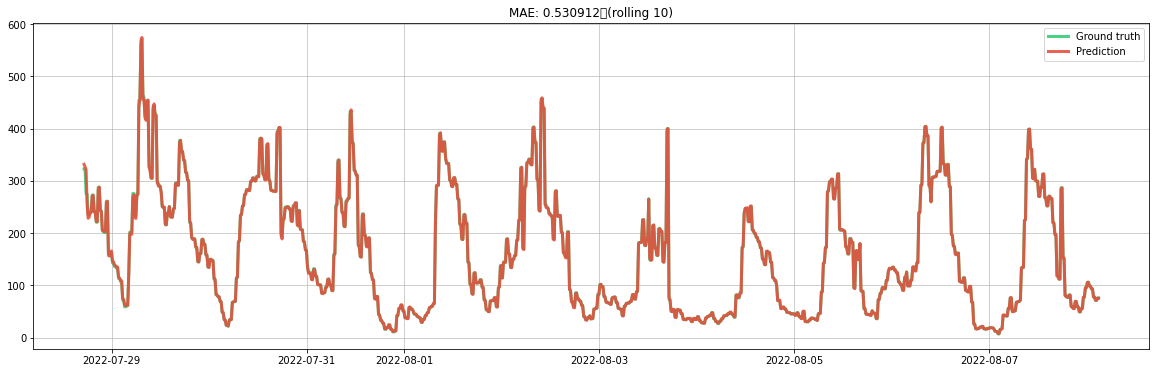

In [205]:
from river import metrics
import matplotlib.pyplot as plt


def evaluate_model(model): 

    metric = metrics.Rolling(metrics.MAE(), 10)

    dates = []
    y_trues = []
    y_preds = []

    for x, y in stream.iter_csv('hospital_wait.csv', target = 'value', **params):

        # Obtain the prior prediction and update the model in one go
        y_pred = model.predict_one(x)
        model.learn_one(x, y)

        # Update the error metric
        metric.update(y, y_pred)

        # Store the true value and the prediction
        dates.append(x['time'])
        y_trues.append(y)
        y_preds.append(y_pred)

    # Plot the results
    fig, ax = plt.subplots(figsize=(20, 6))
    ax.grid(alpha=0.75)
    ax.plot(dates, y_trues, lw=3, color='#2ecc71', alpha=800, label='Ground truth')
    ax.plot(dates, y_preds, lw=3, color='#e74c3c', alpha=800, label='Prediction')
    ax.legend()
    ax.set_title(metric)
evaluate_model(model)

In [206]:
def make_model(alpha):
    models = [linear_model.LinearRegression(optimizer=optim.SGD(lr=lr), loss=optim.losses.Quantile(alpha=alpha)) for lr in [0.05, 0.02, 0.01, 0.005, 0.002, 0.0001]]


    model = compose.Pipeline(
        ('features', compose.TransformerUnion(
            ('date_progress', compose.FuncTransformer(get_date_progress)),
            ('lags', compose.FuncTransformer(get_lag))
        )))

    model += (
        get_hour | 
            feature_extraction.TargetAgg(
                by=['h'], how=stats.Mean()


    ))
    # model += (
    #     get_minute | 
    #         feature_extraction.TargetAgg(
    #             by=['m'], how=stats.Mean()


    # ))

    model |=  preprocessing.StandardScaler()
    model |= preprocessing.TargetStandardScaler( 
        model_selection.UCBRegressor(
            models + 
            [
                tree.HoeffdingTreeRegressor(grace_period=20),
                linear_model.PARegressor(C=0.012, eps=0.05),
            ],
            delta=0.01, burn_in=100, seed=1
        )
    )
    return model


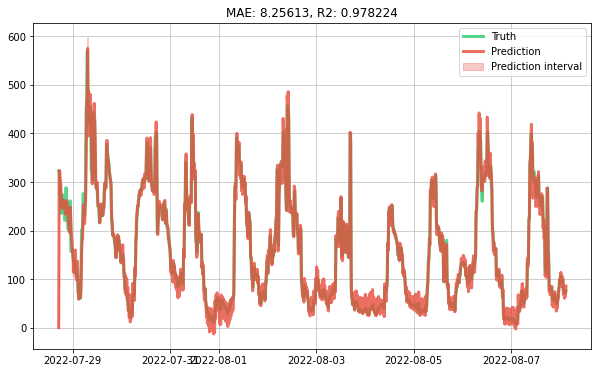

In [207]:
models = {
    'lower': make_model(alpha=0.05),
    'center': make_model(alpha=0.5),
    'upper': make_model(alpha=0.95)
}

dates = []
y_trues = []
y_preds = {
    'lower': [],
    'center': [],
    'upper': []
}

for x, y in stream.iter_csv('hospital_wait.csv', target = 'value', **params):
    y_trues.append(y)
    dates.append(x['time'])

    for name, model in models.items():
        y_preds[name].append(model.predict_one(x))
        model.learn_one(x, y)

    # Update the error metric
    metric.update(y, y_preds['center'][-1])

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(alpha=0.75)
ax.plot(dates, y_trues, lw=3, color='#2ecc71', alpha=0.8, label='Truth')
ax.plot(dates, y_preds['center'], lw=3, color='#e74c3c', alpha=0.8, label='Prediction')
ax.fill_between(dates, y_preds['lower'], y_preds['upper'], color='#e74c3c', alpha=0.3, label='Prediction interval')
ax.legend()
ax.set_title(metric);